# Customer & Market Analysis Part1 Exercises

RFM Analysis and Pareto Rule

You are hired as a Data Scientist from a large online retail company based in the UK to provide an in-depth analysis regarding the behavior of their customer base.

The provided ‘’Online Retail’’ dataset contains all purchases made during an eight month period with the following information:
Each line corresponds to an item purchased.

InvoiceNo: BillNo number. A unique number for each transaction.

StockCode: Stock Code for each product

Description: Product description.

Quantity: It refers to how many of the products in the invoices have been sold.

InvoiceDate: Invoice date.

UnitPrice: Product price (pound)

CustomerID: Unique customer number.

Country: The name of the country where the customer lives.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr
from datetime import datetime, timedelta
import copy
plt.rcParams['figure.figsize'] = [10, 5]
import seaborn as sns


In [2]:
df=pd.read_csv('Online Retail.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [16]:
#print(list(df['UnitPrice'].unique()))

In [6]:
df['InvoiceDate'] = pd.to_datetime(df["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df['Quantity']=df['Quantity'].abs()
df['UnitPrice']=df['UnitPrice'].abs()
df.dropna(inplace=True)

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 1.Find and plot top 25 customers having the most transactions


In [19]:
df1 = df.groupby(['CustomerID'])['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending=False).head(25)
df1['Transactions'] = df1['InvoiceNo']
del df1['InvoiceNo']
#df1.info()
df1

,CustomerID,Transactions
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
2192,15311.0,2491
1703,14646.0,2085
568,13089.0,1857
698,13263.0,1677
1447,14298.0,1640


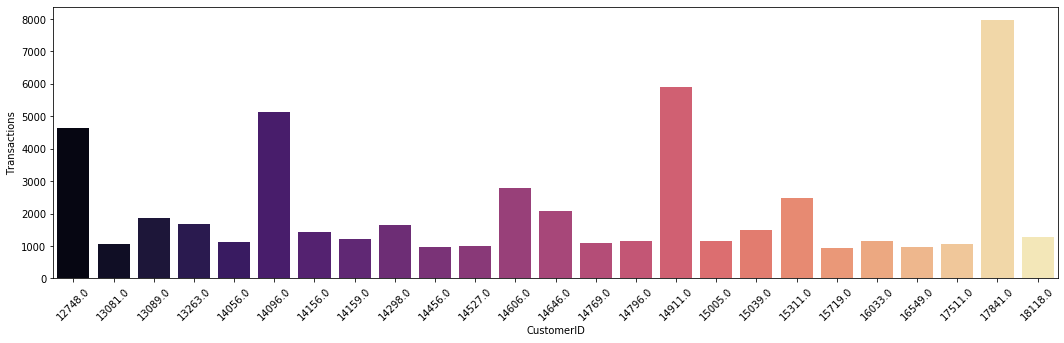

In [20]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='CustomerID', y = 'Transactions',palette = "magma", data=df1)
plt.setp(ax.get_xticklabels(), rotation=45)
None

# 2.Find and plot top 10 products having the most Total Sales


In [21]:
df2 = df.copy()

In [22]:
df2['Total Sales']= df2['Quantity']*df2['UnitPrice']
df_prod = df2.groupby('Description')['Total Sales'].sum().reset_index().sort_values(by='Total Sales',ascending=False).head(10)
df_prod

,Description,Total Sales
2329,"PAPER CRAFT , LITTLE BIRDIE",336939.20
2140,Manual,165945.32
2002,MEDIUM CERAMIC TOP STORAGE JAR,158896.37
2780,REGENCY CAKESTAND 3 TIER,152315.50
3716,WHITE HANGING HEART T-LIGHT HOLDER,107072.45
2624,POSTAGE,88897.68
1771,JUMBO BAG RED RETROSPOT,87204.80
2355,PARTY BUNTING,70001.13
217,ASSORTED COLOUR BIRD ORNAMENT,56661.46
2669,RABBIT NIGHT LIGHT,51554.60


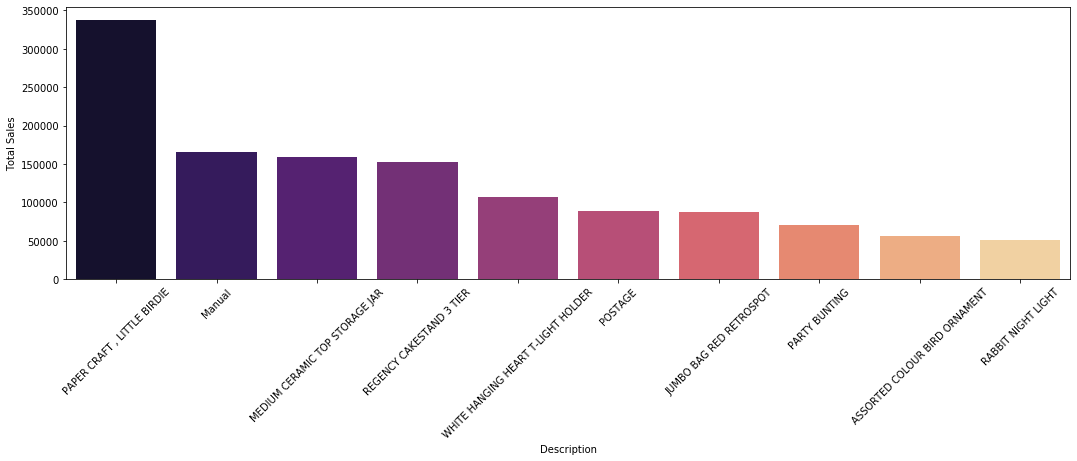

In [23]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Description', y = 'Total Sales',palette = "magma", data=df_prod)
plt.setp(ax.get_xticklabels(), rotation=45)
None

# 3.Implement RFM Analysis on the customer base and categorize the customers into 12 different categories based on the labeling used in live-coding


In [25]:
df["Recency"] = (df["InvoiceDate"].max() - df["InvoiceDate"]).dt.days
df['Total_Sales']= df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34


In [36]:
data_process = df.groupby(["CustomerID"]).agg({"Recency": np.min,
                                               "InvoiceDate": pd.Series.nunique,
                                               "Total_Sales": np.sum}).reset_index()

data_process.rename(columns={"Recency":"Recency", "InvoiceDate":"Frequency", "Total_Sales":"Monetary"}, inplace = True)
#data_process['Frequency'].()
#data_process

In [37]:
# Create RFM scores based on distribution percentiles

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
data_process["recency_score"] = pd.qcut(data_process["Recency"],4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
data_process["frequency_score"] = pd.qcut(data_process["Frequency"].rank(method='first'), 4,labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
data_process["monetary_score"] = pd.qcut(data_process["Monetary"], 4,labels=[1, 2, 3, 4])

data_process

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,12346.0,325,2,154367.20,1,2,4
1,12347.0,1,7,4310.00,4,4,4
2,12348.0,74,4,1797.24,2,3,4
3,12349.0,18,1,1757.55,3,1,4
4,12350.0,309,1,334.40,1,1,2
...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,2,1
4368,18281.0,180,1,80.82,1,2,1
4369,18282.0,7,3,179.50,4,3,1
4370,18283.0,3,16,2094.88,4,4,4


In [39]:
data_process["RFM_Segment"] = data_process["recency_score"].astype(str) + data_process["frequency_score"].astype(str) + data_process["monetary_score"].astype(str)
data_process["RFM Score"] = data_process[["recency_score", "frequency_score", "monetary_score"]].sum(axis=1)
data_process

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score
0,12346.0,325,2,154367.20,1,2,4,124,7.0
1,12347.0,1,7,4310.00,4,4,4,444,12.0
2,12348.0,74,4,1797.24,2,3,4,234,9.0
3,12349.0,18,1,1757.55,3,1,4,314,8.0
4,12350.0,309,1,334.40,1,1,2,112,4.0
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,2,1,121,4.0
4368,18281.0,180,1,80.82,1,2,1,121,4.0
4369,18282.0,7,3,179.50,4,3,1,431,8.0
4370,18283.0,3,16,2094.88,4,4,4,444,12.0


In [40]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}



data_process["Segment_labels"] = data_process["RFM_Segment"]
data_process["Segment_labels"] = data_process["Segment_labels"].replace(segt_map, regex= True)
data_process.head()

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score,Segment_labels
0,12346.0,325,2,154367.20,1,2,4,124,7.0,Top at Risk
1,12347.0,1,7,4310.00,4,4,4,444,12.0,VIP
2,12348.0,74,4,1797.24,2,3,4,234,9.0,Top Recent
3,12349.0,18,1,1757.55,3,1,4,314,8.0,Top Recent
4,12350.0,309,1,334.40,1,1,2,112,4.0,Need Activation


# 4.For each one of the above segments, calculate the number of customers per segment, total Monetary value (Sales) per segment as well as Mean Recency and Mean Monetary Value per segment.


Bonus: Plot Segments in Treemap using squares according to segment size

In [68]:


df4 = data_process.groupby(["Segment_labels"]).agg({"Monetary": [np.sum,np.mean],
                                              "CustomerID": pd.Series.nunique,
                                             "Recency": np.mean}).reset_index()
df4

#df.groupby("dummy").agg({"returns": [np.mean, np.sum]})

Segment_labels     Monetary              CustomerID     Recency
                              sum         mean    nunique        mean
0         High Loyal   223796.790  1130.286818      198.0   82.747475
1           High New   220960.920   964.894847      229.0   54.144105
2     High Promising   596302.391  1144.534340      521.0   18.001919
3          Low Loyal    85350.160   183.944310      464.0   61.254310
4            Low New    20364.490   190.322336      107.0    8.523364
5       Medium Loyal    45700.891   513.493157       89.0   84.438202
6         Medium New   224646.111   455.671625      493.0   51.407708
7   Medium Potential    78696.020   539.013836      146.0   20.609589
8    Need Activation   400186.920   387.778023     1032.0  249.406977
9         Top Recent   633004.500  3180.927136      199.0   72.085427
10      Top at Risk    461831.311  8246.987696       56.0  204.071429
11               VIP  6531909.490  7794.641396      838.0   13.762530

In [92]:
#df4['Monetary']['mean']= df4['Monetary']['mean'].rename('Monetary_mean',inplace=True)

In [93]:
df4

Segment_labels     Monetary              CustomerID     Recency
                              sum         mean    nunique        mean
0         High Loyal   223796.790  1130.286818      198.0   82.747475
1           High New   220960.920   964.894847      229.0   54.144105
2     High Promising   596302.391  1144.534340      521.0   18.001919
3          Low Loyal    85350.160   183.944310      464.0   61.254310
4            Low New    20364.490   190.322336      107.0    8.523364
5       Medium Loyal    45700.891   513.493157       89.0   84.438202
6         Medium New   224646.111   455.671625      493.0   51.407708
7   Medium Potential    78696.020   539.013836      146.0   20.609589
8    Need Activation   400186.920   387.778023     1032.0  249.406977
9         Top Recent   633004.500  3180.927136      199.0   72.085427
10      Top at Risk    461831.311  8246.987696       56.0  204.071429
11               VIP  6531909.490  7794.641396      838.0   13.762530

In [46]:
import squarify

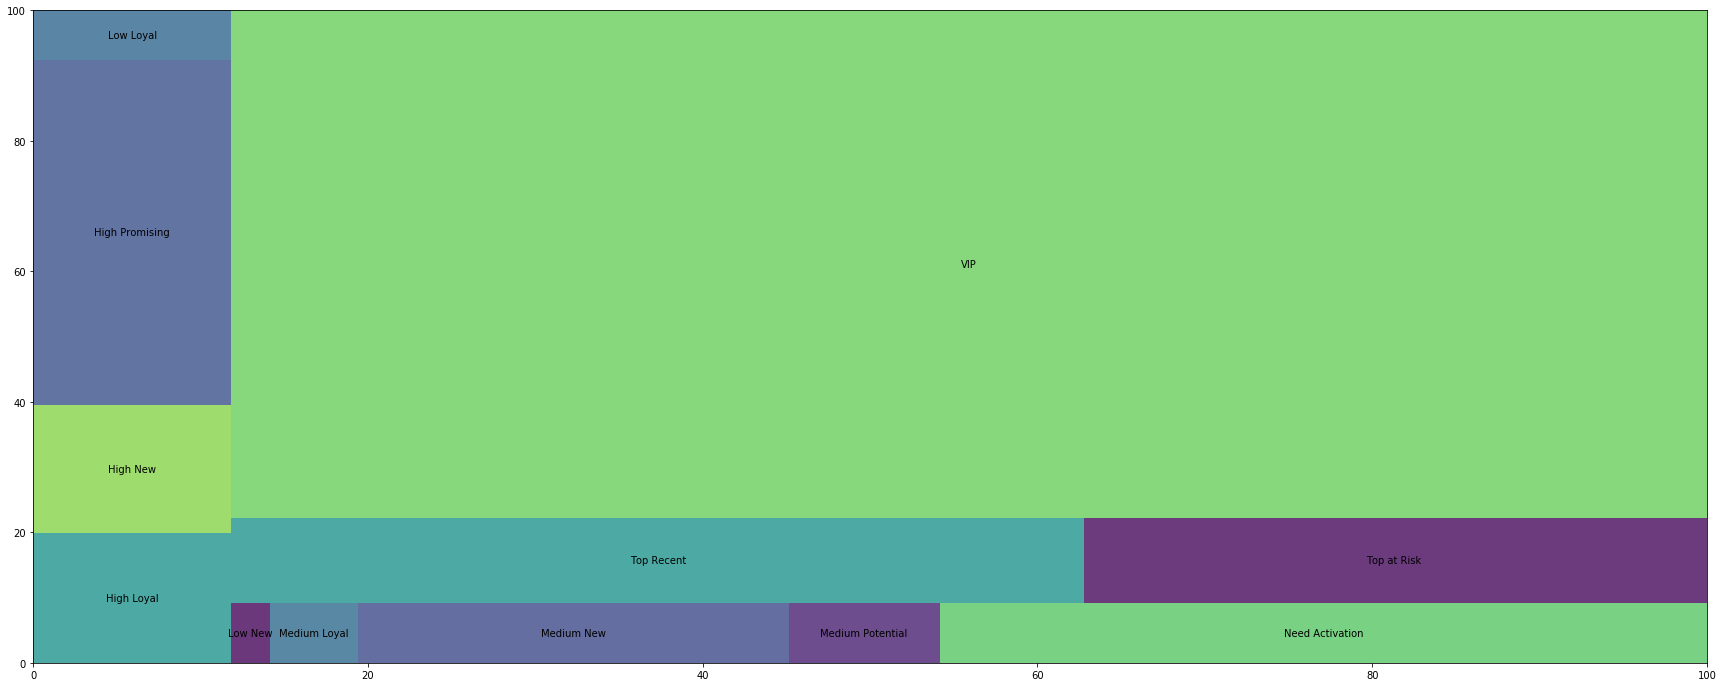

In [91]:
plt.figure(figsize=(30,12))
squarify.plot(sizes=df4['Monetary']['sum'], label=df4['Segment_labels'], alpha=.8 )

# 5.Use the Pareto Principle for the 12 Segments that were produced. Is the Pareto Principle applied for our segments? Make the corresponding plot.


In [94]:
data_process

,CustomerID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score,Segment_labels
0,12346.0,325,2,154367.20,1,2,4,124,7.0,Top at Risk
1,12347.0,1,7,4310.00,4,4,4,444,12.0,VIP
2,12348.0,74,4,1797.24,2,3,4,234,9.0,Top Recent
3,12349.0,18,1,1757.55,3,1,4,314,8.0,Top Recent
4,12350.0,309,1,334.40,1,1,2,112,4.0,Need Activation
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,2,1,121,4.0,Need Activation
4368,18281.0,180,1,80.82,1,2,1,121,4.0,Need Activation
4369,18282.0,7,3,179.50,4,3,1,431,8.0,Low New
4370,18283.0,3,16,2094.88,4,4,4,444,12.0,VIP


In [95]:
seg_pareto = data_process.groupby(["Segment_labels"]).agg({"Monetary": np.sum,
                                                          "CustomerID": pd.Series.count }).reset_index()

#
seg_pareto["Monetary%"] = seg_pareto["Monetary"]/seg_pareto["Monetary"].sum()
seg_pareto = seg_pareto.sort_values(by=["Monetary%"], ascending = False)
seg_pareto["CumulativePercentage"] = (seg_pareto["Monetary"].cumsum()/
                                      seg_pareto["Monetary"].sum()*100).round(2)

seg_pareto

,Segment_labels,Monetary,CustomerID,Monetary%,CumulativePercentage
11,VIP,6531909.490,838.0,0.685927,68.59
9,Top Recent,633004.500,199.0,0.066473,75.24
2,High Promising,596302.391,521.0,0.062619,81.50
10,Top at Risk,461831.311,56.0,0.048498,86.35
8,Need Activation,400186.920,1032.0,0.042024,90.55
6,Medium New,224646.111,493.0,0.023590,92.91
0,High Loyal,223796.790,198.0,0.023501,95.26
1,High New,220960.920,229.0,0.023203,97.58
3,Low Loyal,85350.160,464.0,0.008963,98.48
7,Medium Potential,78696.020,146.0,0.008264,99.31


In [84]:
seg_pareto["CustomerID"][11] + seg_pareto["CustomerID"][9]+ seg_pareto["CustomerID"][2] 

1558.0

In [89]:
1558.0/seg_pareto["CustomerID"].sum()

0.35635864592863675

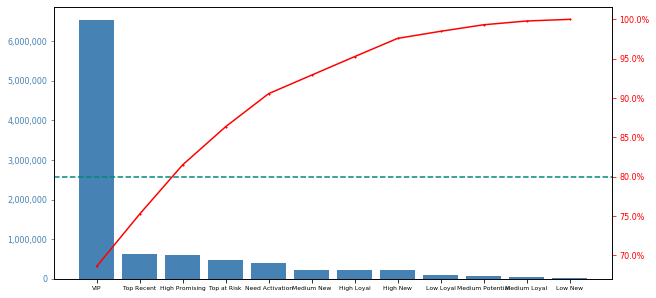

In [90]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(seg_pareto['Segment_labels'], seg_pareto['Monetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(seg_pareto['Segment_labels'], seg_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

# 6.Now, use the Pareto Principle for all individual customers. Is the Pareto Principle applied for our customers base? Make the corresponding plot.


In [ ]:
# pareto group by customer id kai total sales per customer kai cumulative sales for customers
#afou sortarw gia total sales pelatwn 

# Customer & Market Analysis Part2 Exercises

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373,20.34


In [104]:
#Import libraries
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter
from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

ModuleNotFoundError: No module named 'fim'

In [108]:
#!pip install pyfim
#!conda install -c conda-forge pyfim
#!pip install fim-python
!python3 setup_fim.py install

python3: can't open file 'setup_fim.py': [Errno 2] No such file or directory


# 1.Produce an Association Rules Report which will show the below measures: support itemset absolute, support itemset relative pct, confidence pct and lift


# 2.Find the Top5 Association in terms of Support Absolute, confidence and lift and provide an interpretation of your results for these product relations


# 3.Is there product cannibalization between products? If yes, provide for which products. If no, support your statement.


# 4.Provide a full Monthly Cohort Analysis for your customer base.


# 5.If we exclude the first and the last cohort, which are the top 3 and least 3 cohorts regarding new customers? (cohort size)


# 6.Including all cohorts, which cohort and for which month the company has the largest customer retention? Also which cohort and for which month the company has the lowest customer retention?